In [7]:
#Step 1: Data Collection
#First, download the dataset from Kaggle 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

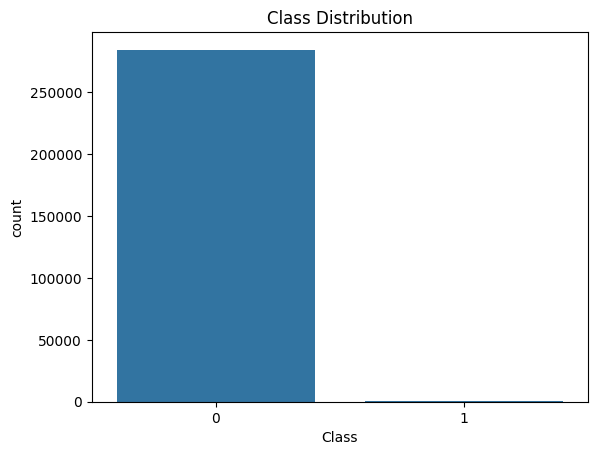

In [8]:
#Step 2: Data Preprocessing and Exploratory Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Handling missing values
# If there are any NaN values, we will drop those rows
df = df.dropna()

# Distribution of the target variable
print(df['Class'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Scale the 'Amount' feature
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop the original 'Amount' column
df.drop(['Time', 'Amount'], axis=1, inplace=True)



In [9]:
#Step 3: Feature Engineering and Data Splitting
# Split the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']

# Check again for NaN values in y
print(y.isnull().sum())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(X_train.shape, X_test.shape)


0
(199364, 29) (85443, 29)


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.61      0.72       148

    accuracy                           1.00     85443
   macro avg       0.93      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85280    15]
 [   57    91]]
ROC AUC Score: 0.9564924118678735


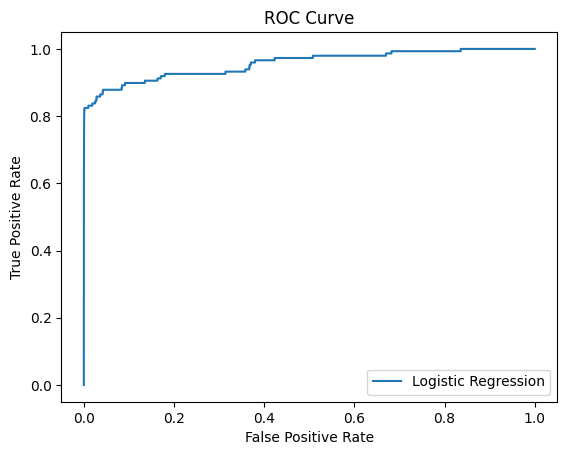

In [10]:
#Step 4: Model Training and Evaluation
# Initialize the models
lr = LogisticRegression()
rf = RandomForestClassifier()

# Train the Logistic Regression model
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_prob_lr = lr.predict_proba(X_test)[:, 1]

# Evaluate the Logistic Regression model
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_lr))

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lr)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()




Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.77      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85290     5]
 [   34   114]]
ROC AUC Score: 0.9239481259793119


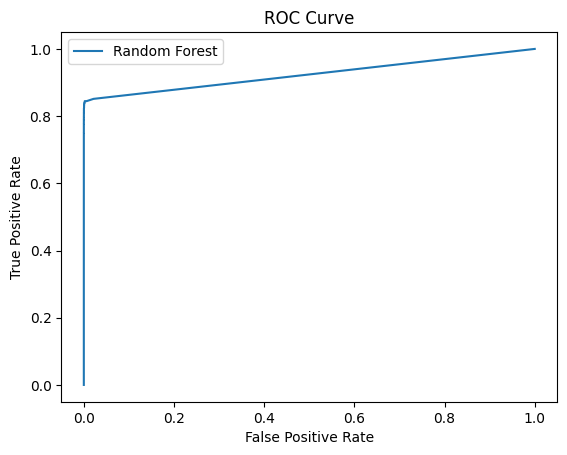

In [6]:
# Train the Random Forest model
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()